In [37]:
import pandas as pd

df = pd.read_csv("mxmh_survey_results.csv")

In [38]:
import warnings

warnings.simplefilter("ignore")

In [39]:
# 年齡18-22以外刪除
df = df[(df.Age < 23) & (df.Age > 17)]

In [40]:
# 移除缺失值
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 235 entries, 2 to 734
Data columns (total 32 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Timestamp                     235 non-null    object 
 1   Age                           235 non-null    float64
 2   Primary streaming service     235 non-null    object 
 3   Hours per day                 235 non-null    float64
 4   While working                 235 non-null    object 
 5   Instrumentalist               235 non-null    object 
 6   Composer                      235 non-null    object 
 7   Fav genre                     235 non-null    object 
 8   Exploratory                   235 non-null    object 
 9   Foreign languages             235 non-null    object 
 10  BPM                           235 non-null    float64
 11  Frequency [Classical]         235 non-null    object 
 12  Frequency [Country]           235 non-null    object 
 13  Frequency 

In [41]:
from matplotlib import rc

# 列出可用的字體
# for font in font_manager.fontManager.ttflist:
#     print(font.name)

#設定中文字體
rc('font', family='Microsoft YaHei')

# 設定 Music effects 的順序
df['Music effects'] = pd.Categorical(df['Music effects'], categories=['Improve', 'No effect', 'Worsen'], ordered=True)

# color
palette = {
    'Improve': 'indianred',
    'No effect': 'gold',
    'Worsen': 'darkblue'
}

## 音樂效果

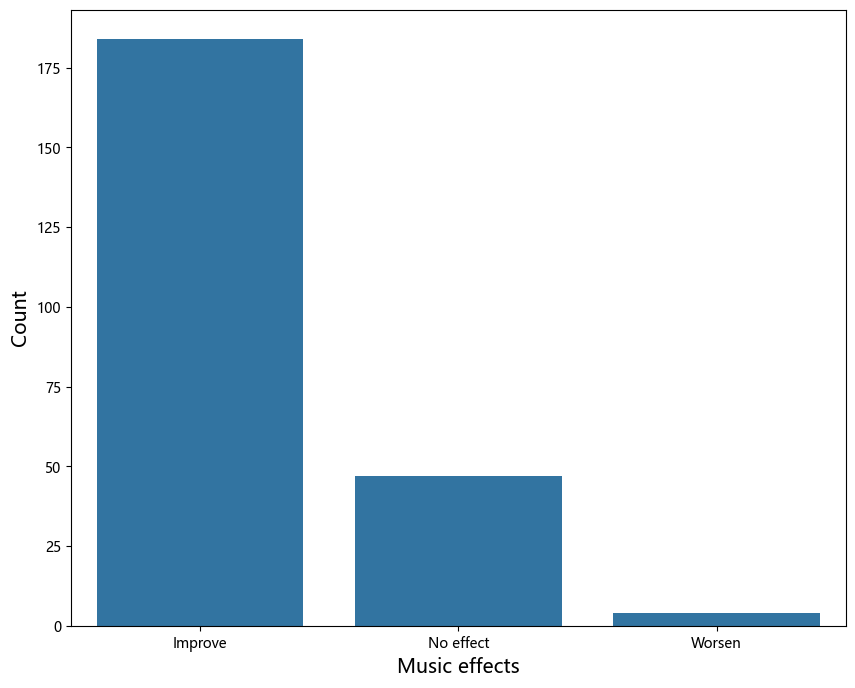

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))

sns.countplot(data=df, x='Music effects')

plt.xlabel('Music effects', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()

**可以發現大部分的音樂都有顯著的正面效果**

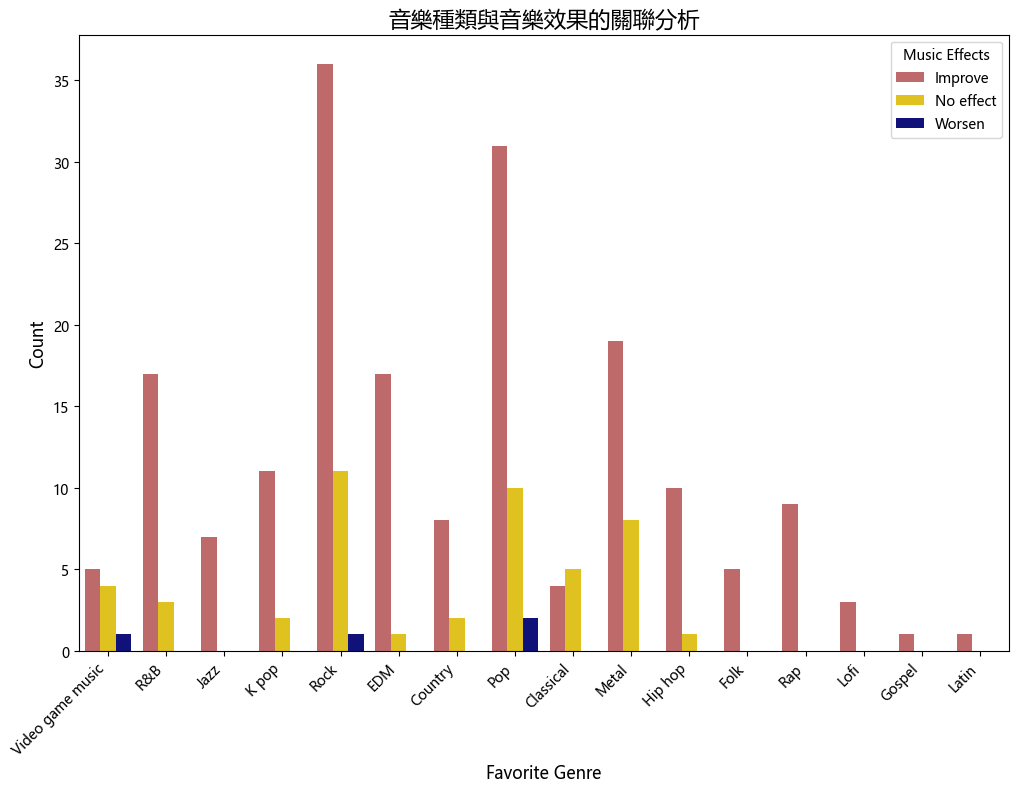

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))

sns.countplot(data=df, x='Fav genre', hue='Music effects', palette=palette)

plt.title('音樂種類與音樂效果的關聯分析', fontsize=16)
plt.xlabel('Favorite Genre')
plt.ylabel('Count')

plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('Favorite Genre', fontsize=12, color='black')
plt.ylabel('Count', fontsize=12, color='black')

plt.legend(title='Music Effects')
plt.show()


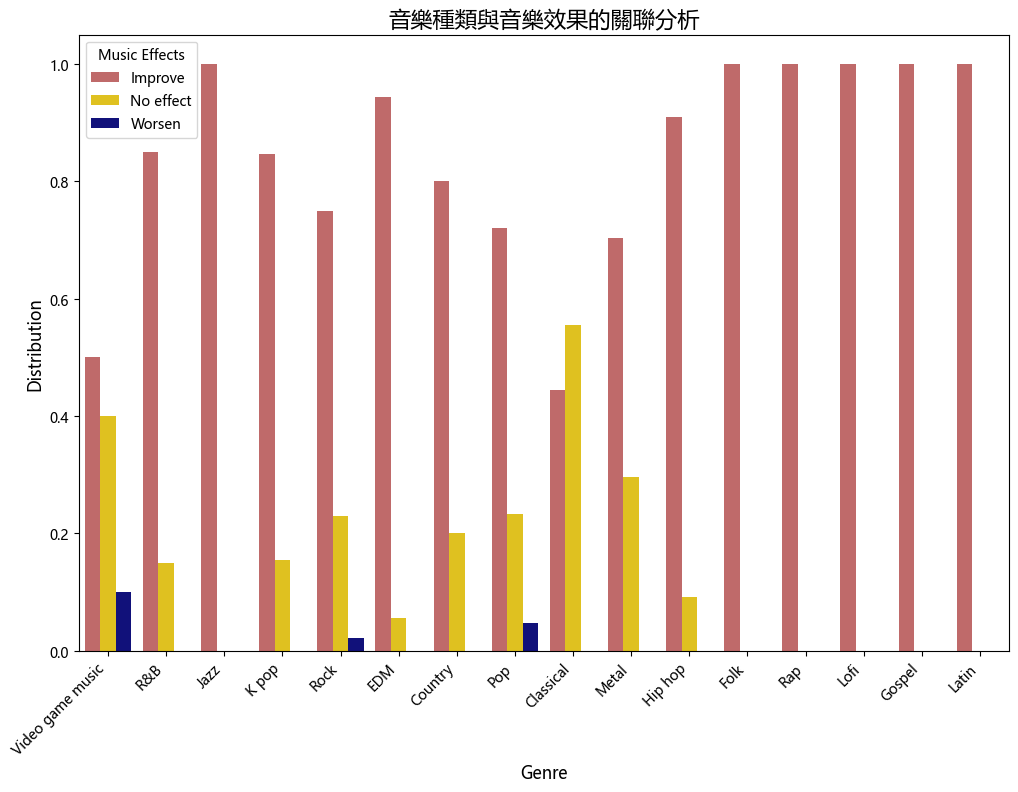

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

df_plot=df
df_plot['count'] = df_plot.groupby(['Fav genre', 'Music effects'])['Music effects'].transform('count')
df_plot['total'] = df_plot.groupby('Fav genre')['Fav genre'].transform('count')
df_plot['probability'] = df_plot['count'] / df_plot['total']

df_plot = df_plot.drop_duplicates(subset=['Fav genre', 'Music effects'])

plt.figure(figsize=(12, 8))

sns.barplot(data=df_plot, x='Fav genre', y='probability', hue='Music effects', palette=palette)

plt.title('音樂種類與音樂效果的關聯分析', fontsize=16)
plt.xlabel('Genre', fontsize=12, color='black')
plt.ylabel('Distribution', fontsize=12, color='black')

plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)

plt.legend(title='Music Effects')
plt.show()


**大部分音樂有正面效果**  
推測:  
大多數其他音樂類型（除Video Game、Pop和Rock外）呈現正面效果，顯示這些音樂成功地提升了聽眾的情緒或滿足了他們的需求。  
  
**Classical 和 Video Game Music 有較大比例沒有效果**  
推測:  
Classical Music：可能因其穩定和中性的特質，在某些應用場景中無法引起強烈的情感反應。  
Video Game Music：可能在某些場景下未能有效地增強遊戲氛圍或情感。
  
**Video Game Music、Pop 和 Rock 有少數負面效果:**  
推測:  
Video Game Music：可能因為某些遊戲場景（例如：失敗或困難的挑戰）故意設計使用負面效果的音樂來強化玩家的情感反應。  
Pop 和 Rock：這些負面效果可能來自一些具有強烈情感的歌曲（例如：抒情搖滾歌曲可能涉及悲傷主題）  
    

In [45]:
# outlier deletion
df_bpm = df[(df.BPM < 500) & (df.BPM > 20)]
print(df_bpm['BPM'].max())
print(df_bpm['BPM'].min())

220.0
52.0


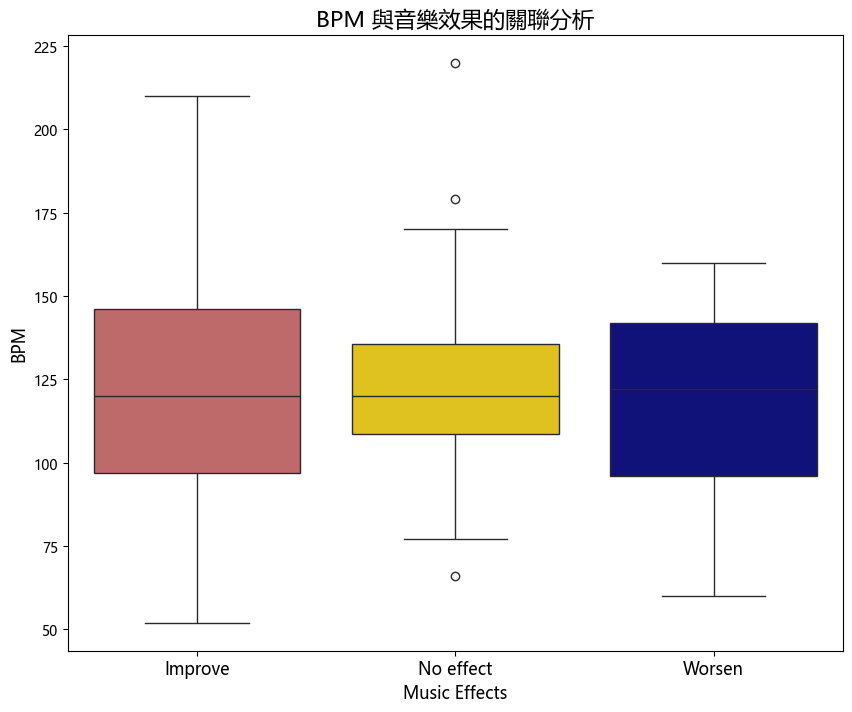

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))

sns.boxplot(data=df_bpm, x='Music effects', y='BPM', palette=palette)

plt.title('BPM 與音樂效果的關聯分析', fontsize=16)
plt.xlabel('Music Effects', fontsize=12, color='black')
plt.ylabel('BPM', fontsize=12, color='black')

plt.xticks(fontsize=12)
plt.yticks(fontsize=10)

plt.show()


In [47]:
import numpy as np

# 按音樂效果類別分組計算四分位數和 IQR
grouped = df_bpm.groupby('Music effects')['BPM']

# 計算四分位數
Q1 = grouped.quantile(0.25)
Q2 = grouped.quantile(0.5)
Q3 = grouped.quantile(0.75)

# 計算 IQR
IQR = Q3 - Q1

# 顯示結果
print("每個音樂效果類別的四分位數：")
print(Q1)
print(Q2)
print(Q3)
print("\n每個音樂效果類別的 IQR：")
print(IQR)

每個音樂效果類別的四分位數：
Music effects
Improve       97.0
No effect    108.5
Worsen        96.0
Name: BPM, dtype: float64
Music effects
Improve      120.0
No effect    120.0
Worsen       122.0
Name: BPM, dtype: float64
Music effects
Improve      146.0
No effect    135.5
Worsen       142.0
Name: BPM, dtype: float64

每個音樂效果類別的 IQR：
Music effects
Improve      49.0
No effect    27.0
Worsen       46.0
Name: BPM, dtype: float64


**Improve音樂效果類別：**  
這個音樂效果類別的 BPM 數據集中在較低的範圍內，並且具有相對較小的 IQR（49）。  
這表明當音樂效果被描述為改善時，通常對應著 BPM 在較高範圍內的變化，且變化幅度可能相對較大。  

**No effect音樂效果類別：**  
這個音樂效果類別的 BPM 數據集中在中等範圍內，但其 IQR（27）相對較小。  
這可能表明雖然該音樂效果類別被描述為無效，但 BPM 的變化幅度相對較小，可能在整體上對 BPM 沒有明顯的影響。  

**Worsen音樂效果類別：**  
這個音樂效果類別的 BPM 數據集中在較高的範圍內，並且具有相對較大的 IQR（46）。  
這表明當音樂效果被描述為惡化時，通常對應著 BPM 在較低範圍內的變化，且變化幅度相對一致。  

**其實這三種沒有差很多**

In [48]:
filtered_df = df[df['Hours per day'] > 16]
print(filtered_df)

               Timestamp   Age Primary streaming service  Hours per day  \
726  10/23/2022 20:50:27  18.0               Apple Music           18.0   

    While working Instrumentalist Composer Fav genre Exploratory  \
726           Yes              No       No       EDM         Yes   

    Foreign languages  ...  Frequency [Rock] Frequency [Video game music]  \
726                No  ...         Sometimes                    Sometimes   

    Anxiety Depression Insomnia   OCD Music effects count total probability  
726     9.0        8.0      5.0  10.0       Improve    17    18    0.944444  

[1 rows x 35 columns]


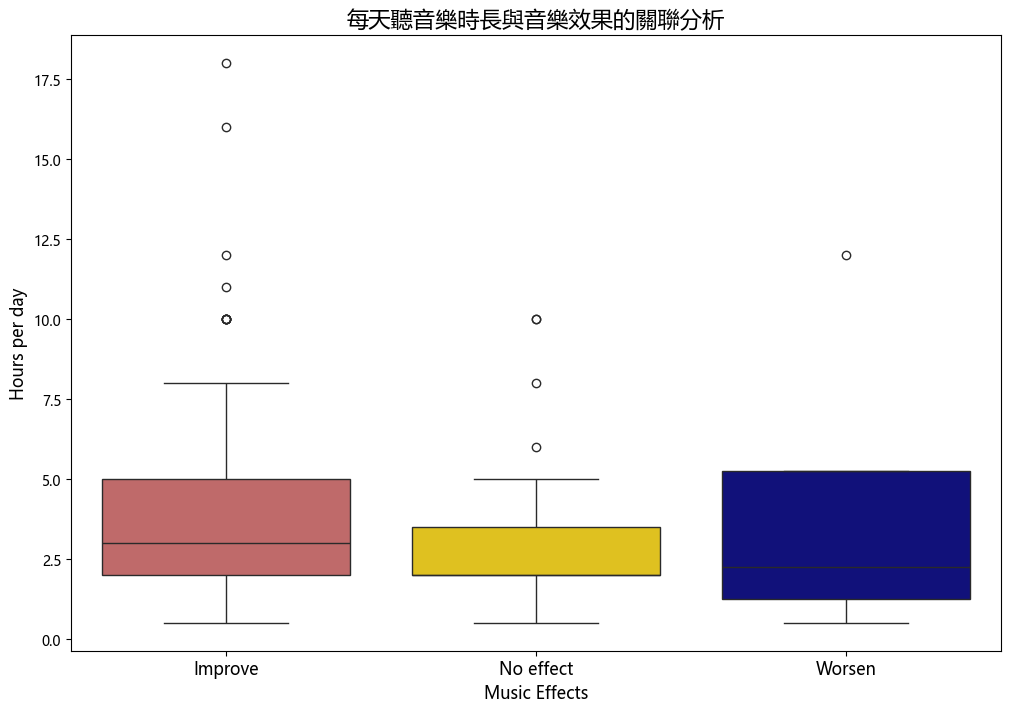

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))

sns.boxplot(data=df, x='Music effects', y='Hours per day', palette=palette)

plt.title('每天聽音樂時長與音樂效果的關聯分析', fontsize=16)
plt.xlabel('Music Effects', fontsize=12, color='black')
plt.ylabel('Hours per day', fontsize=12, color='black')

plt.xticks(fontsize=12)
plt.yticks(fontsize=10)

plt.show()


In [50]:
import numpy as np

# 按音樂效果類別分組計算四分位數和 IQR
grouped = df_bpm.groupby('Music effects')['Hours per day']

# 計算四分位數
Q1 = grouped.quantile(0.25)
Q2 = grouped.quantile(0.5)
Q3 = grouped.quantile(0.75)

# 計算 IQR
IQR = Q3 - Q1

# 顯示結果
print("每個音樂效果類別的四分位數：")
print("Q1: ", Q1)
print("Q2: ", Q2)
print("Q3: ", Q3)
print("\n每個音樂效果類別的 IQR：")
print(IQR)

每個音樂效果類別的四分位數：
Q1:  Music effects
Improve      2.00
No effect    2.00
Worsen       1.25
Name: Hours per day, dtype: float64
Q2:  Music effects
Improve      3.00
No effect    2.00
Worsen       2.25
Name: Hours per day, dtype: float64
Q3:  Music effects
Improve      5.00
No effect    3.50
Worsen       5.25
Name: Hours per day, dtype: float64

每個音樂效果類別的 IQR：
Music effects
Improve      3.0
No effect    1.5
Worsen       4.0
Name: Hours per day, dtype: float64


**提升效果：中位數為3.00小時，IQR為3.00小時**  
**無效果：中位數為2.00小時，IQR為1.50小時**  
**惡化效果：中位數為2.25小時，IQR為4.00小時**  

**無法得出結論**

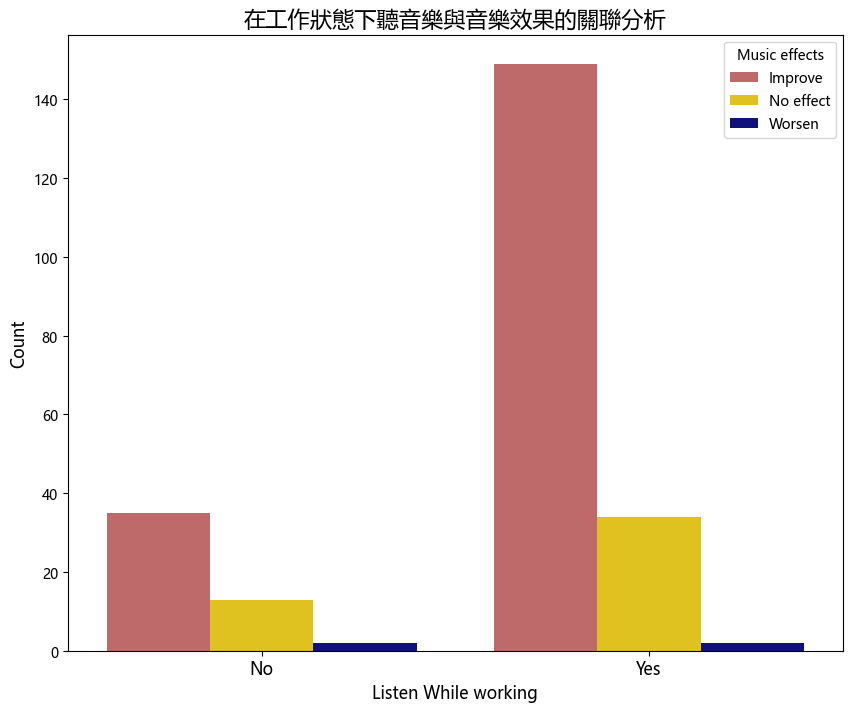

In [51]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))

sns.countplot(data=df, x='While working', hue='Music effects', palette=palette)

plt.title('在工作狀態下聽音樂與音樂效果的關聯分析', fontsize=16)
plt.xlabel('Listen While working', fontsize=12, color='black')
plt.ylabel('Count', fontsize=12, color='black')

plt.xticks(fontsize=12)
plt.yticks(fontsize=10)

plt.legend(title='Music effects')

plt.show()

In [52]:
import scipy.stats as stats

# 創建列聯表
contingency_table = pd.crosstab(df['While working'], df['Music effects'])

# 執行卡方檢驗
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

print(f"Chi-squared: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of freedom: {dof}")
print("Expected frequencies:")
print(expected)


Chi-squared: 3.6720475910693304
P-value: 0.15945017379922427
Degrees of freedom: 2
Expected frequencies:
[[ 39.14893617  10.           0.85106383]
 [144.85106383  37.           3.14893617]]


**P-value (0.159) 大於常用的顯著性水平（如 0.05 或 0.01），因此我們無法拒絕原假設。這意味著我們沒有足夠的證據表明在工作狀態下聽音樂與音樂效果之間存在顯著關聯。**

**Chi-squared 值 (3.67) 並不是非常高，這也表明觀察到的數據與期望數據之間的差異並不大。**

## 失調or疾病

Anxiety（焦慮）  
Depression（抑鬱）  
Insomnia（失眠）  
OCD（強迫症）  　

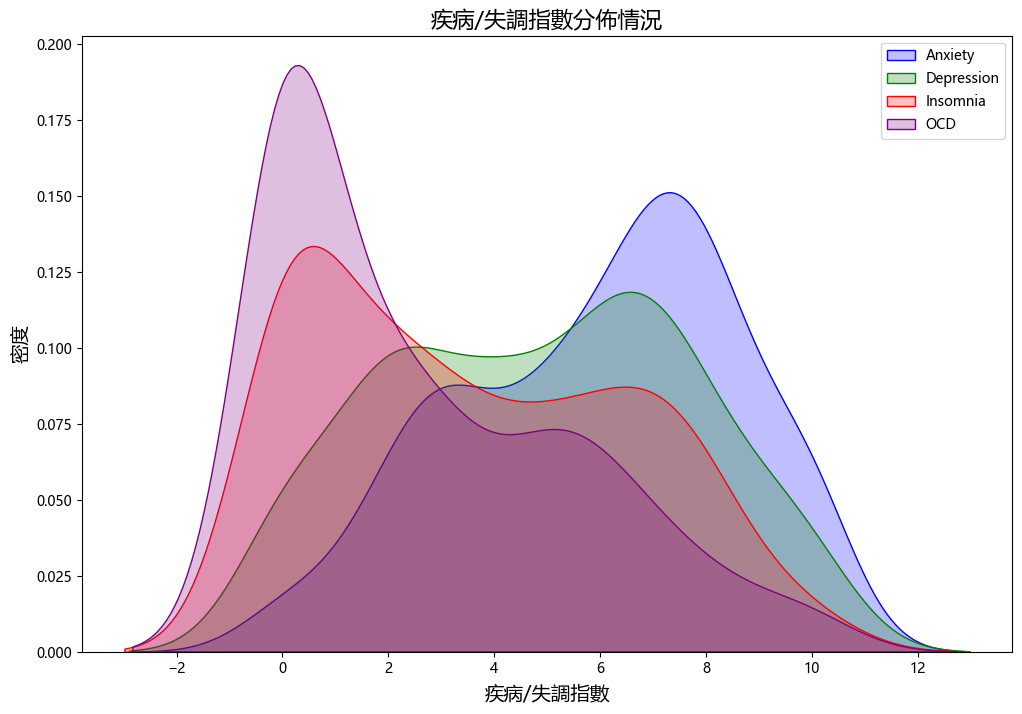

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))

sns.kdeplot(data=df['Anxiety'], color='blue', label='Anxiety', shade=True)
sns.kdeplot(data=df['Depression'], color='green', label='Depression', shade=True)
sns.kdeplot(data=df['Insomnia'], color='red', label='Insomnia', shade=True)
sns.kdeplot(data=df['OCD'], color='purple', label='OCD', shade=True)

plt.title('疾病/失調指數分佈情況', fontsize=16)
plt.xlabel('疾病/失調指數', fontsize=14)
plt.ylabel('密度', fontsize=14)

plt.legend()
plt.show()

In [54]:
df['Total_Score'] = df['Anxiety'] + df['Depression'] + df['Insomnia'] + df['OCD']

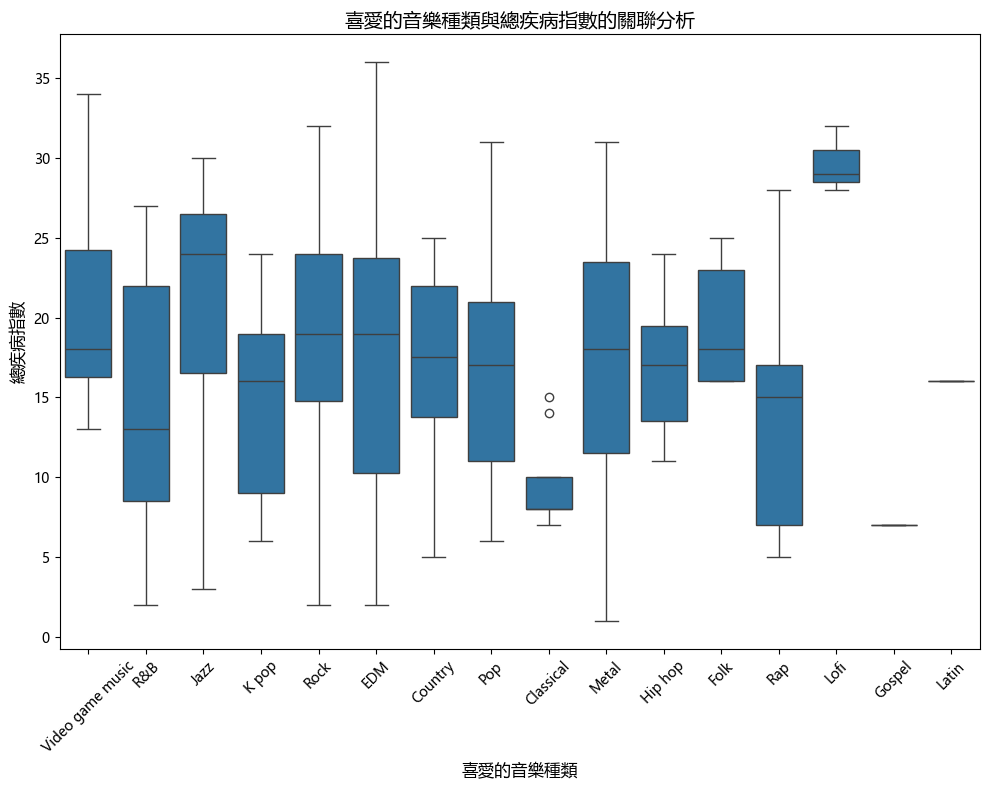

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.boxplot(x='Fav genre', y='Total_Score', data=df)
plt.title('喜愛的音樂種類與總疾病指數的關聯分析', fontsize=14)
plt.xlabel('喜愛的音樂種類', fontsize=12)
plt.ylabel('總疾病指數', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [56]:
grouped_stats = df.groupby('Fav genre')['Total_Score'].describe()
print(grouped_stats)

                  count       mean        std   min    25%   50%    75%   max
Fav genre                                                                    
Classical           9.0   9.555556   2.962731   7.0   8.00   8.0  10.00  15.0
Country            10.0  16.500000   7.153088   5.0  13.75  17.5  22.00  25.0
EDM                18.0  17.888889  10.162728   2.0  10.25  19.0  23.75  36.0
Folk                5.0  19.600000   4.159327  16.0  16.00  18.0  23.00  25.0
Gospel              1.0   7.000000        NaN   7.0   7.00   7.0   7.00   7.0
Hip hop            11.0  16.909091   4.253341  11.0  13.50  17.0  19.50  24.0
Jazz                7.0  20.428571   9.360505   3.0  16.50  24.0  26.50  30.0
K pop              13.0  14.461538   6.091187   6.0   9.00  16.0  19.00  24.0
Latin               1.0  16.000000        NaN  16.0  16.00  16.0  16.00  16.0
Lofi                3.0  29.666667   2.081666  28.0  28.50  29.0  30.50  32.0
Metal              27.0  17.111111   8.455009   1.0  11.50  18.0

**低指數：Classical、Gospel 這兩類音樂喜好者的總疾病指數相對較低**  
**中等指數：Hip hop、K pop、Pop、R&B、Rap 等音樂喜好者的總疾病指數在中等範圍**  
**高指數：Lofi、Jazz、Video game music、Rock、Folk 等音樂喜好者的總疾病指數較高**  
**從中可以看出，某些音樂類型的喜好者可能與較高的總疾病指數有關聯。**

In [57]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols

df_temp = df.rename(columns=lambda x: x.replace(' ', '_'))

anova_results_genre = {}
for disease in ['Anxiety', 'Depression', 'Insomnia', 'OCD']:
    formula = f'{disease} ~ Fav_genre'
    model = ols(formula, data=df_temp).fit()
    anova_table = sm.stats.anova_lm(model, typ=2)
    anova_results_genre[disease] = anova_table

print("音樂類型的ANOVA結果：")
for disease, anova_table in anova_results_genre.items():
    print(f'ANOVA results for {disease}:')
    print(anova_table)
    print('\n')


音樂類型的ANOVA結果：
ANOVA results for Anxiety:
                sum_sq     df         F    PR(>F)
Fav_genre   232.400157   15.0  2.463132  0.002352
Residual   1377.531758  219.0       NaN       NaN


ANOVA results for Depression:
                sum_sq     df         F    PR(>F)
Fav_genre   282.050800   15.0  2.483208  0.002156
Residual   1658.315157  219.0       NaN       NaN


ANOVA results for Insomnia:
                sum_sq     df         F    PR(>F)
Fav_genre   276.551163   15.0  2.266388  0.005461
Residual   1781.533943  219.0       NaN       NaN


ANOVA results for OCD:
                sum_sq     df         F    PR(>F)
Fav_genre   171.151415   15.0  1.482755  0.113083
Residual   1685.248585  219.0       NaN       NaN




**焦慮症（Anxiety）：p值小於0.05，音樂類型對焦慮症狀有顯著影響**  
**抑鬱症（Depression）：p值小於0.05，音樂類型對抑鬱症狀有顯著影響**  
**失眠（Insomnia）：p值小於0.05，音樂類型對失眠症狀有顯著影響**  
**強迫症（OCD）：p值大於0.05，音樂類型對強迫症狀沒有顯著影響**  
**這表明，不同音樂類型對焦慮、抑鬱和失眠有顯著影響，而對強迫症的影響不顯著。**  

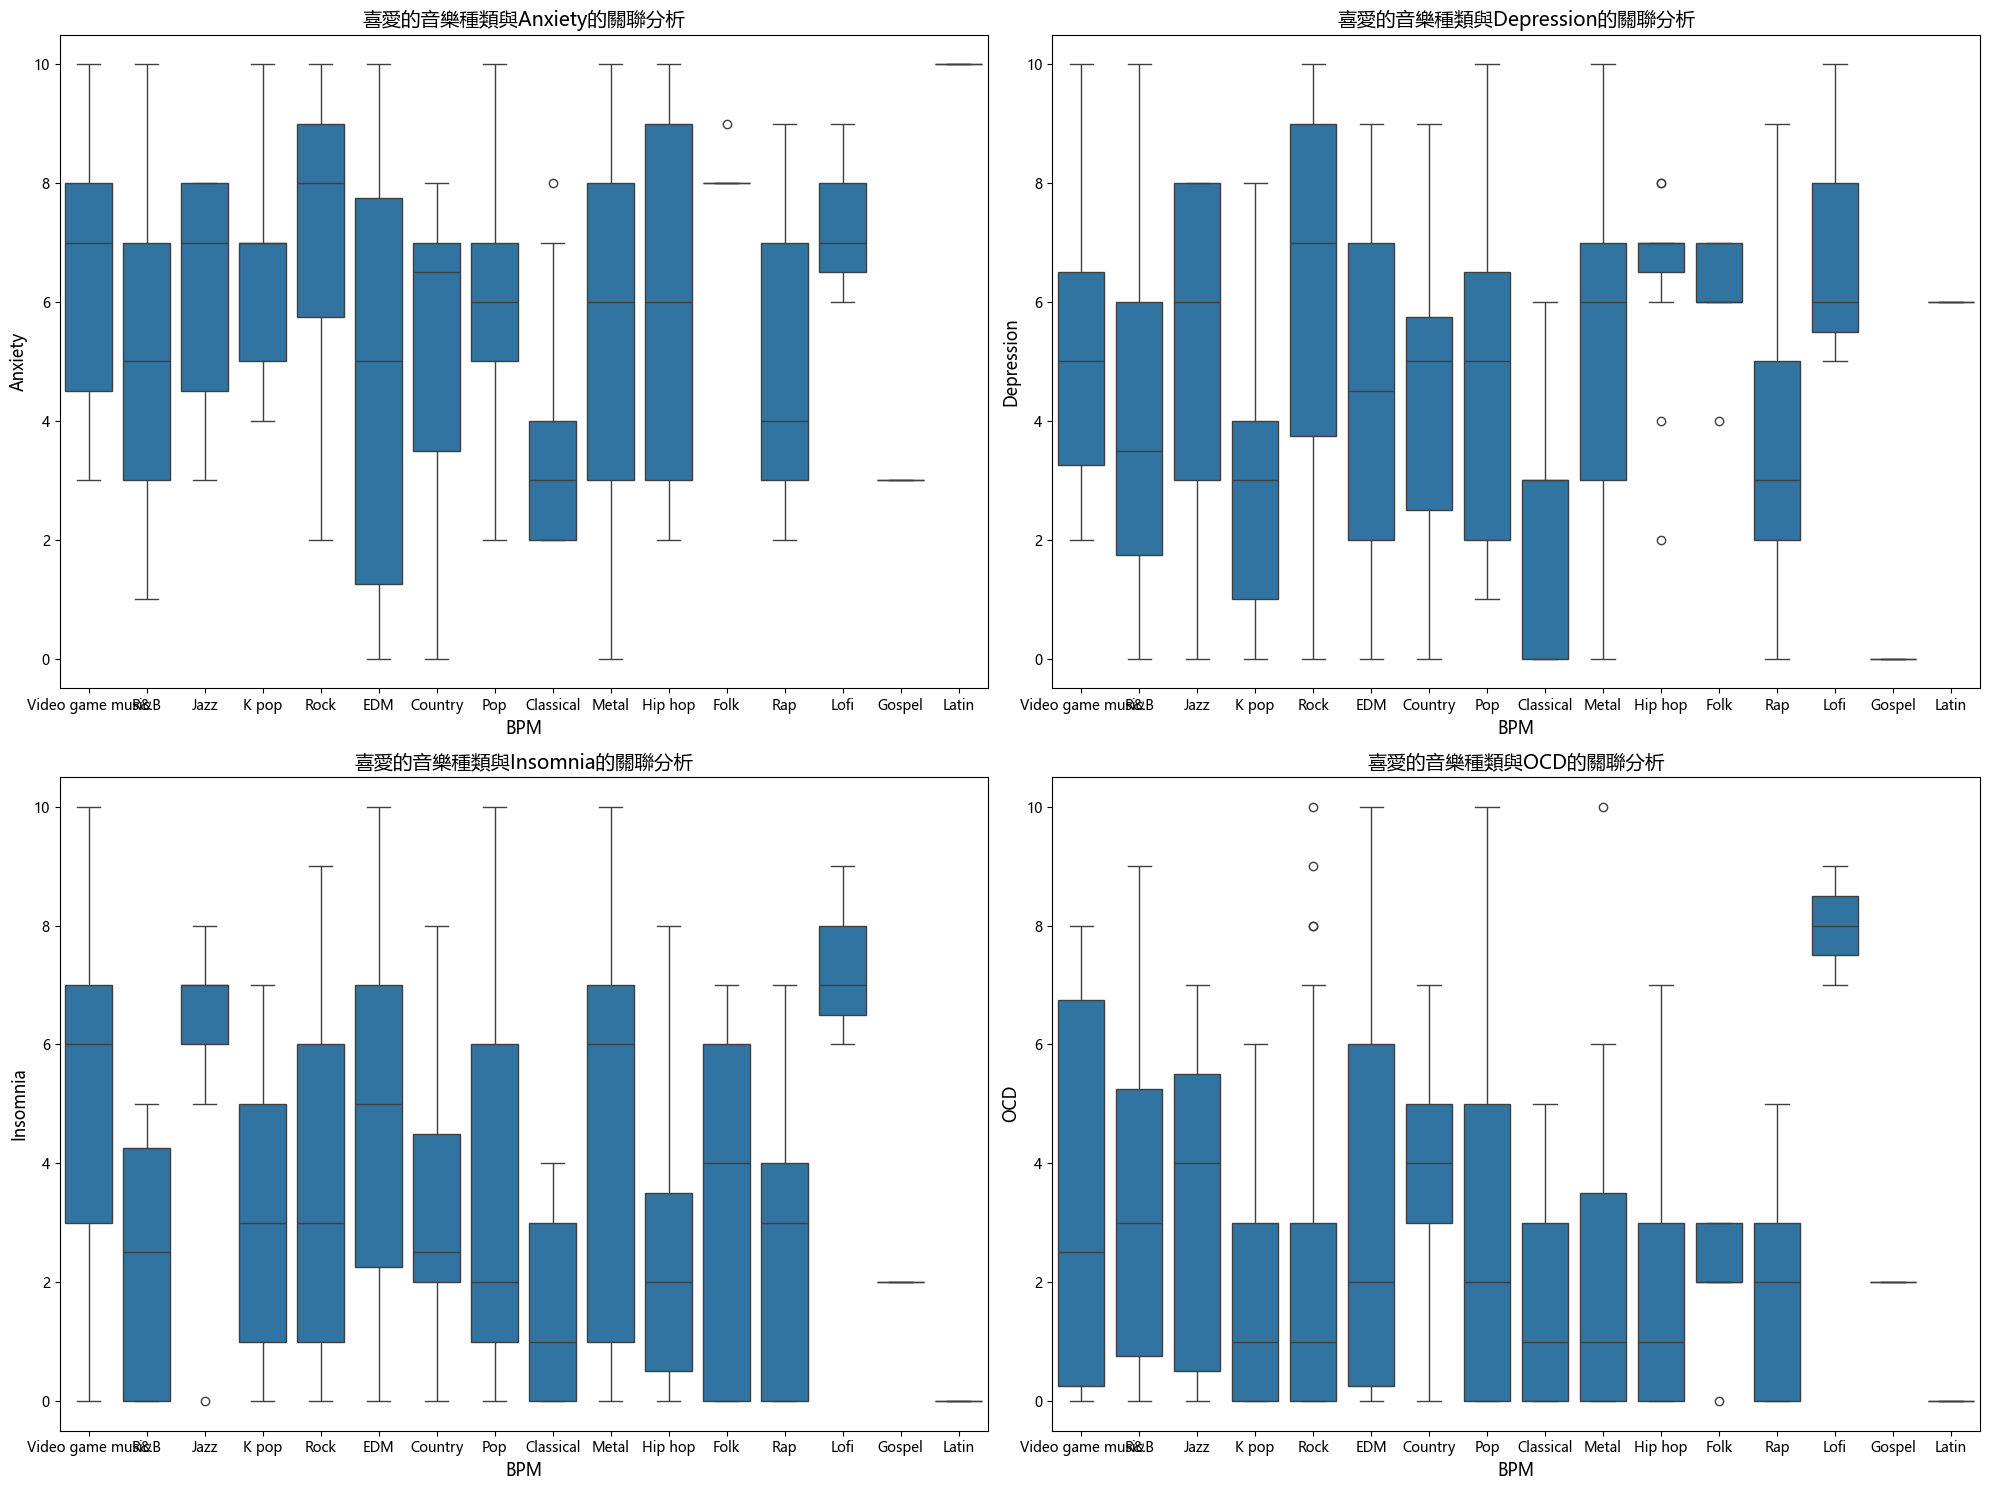

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 15))

for i, disease in enumerate(['Anxiety', 'Depression', 'Insomnia', 'OCD'], 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x='Fav genre', y=disease, data=df)
    plt.title(f'喜愛的音樂種類與{disease}的關聯分析', fontsize=14)
    plt.xlabel('BPM', fontsize=12)
    plt.ylabel(disease, fontsize=12)
    # grouped_stats = df.groupby('Fav genre')[disease].describe()
    # print(grouped_stats)

plt.tight_layout()
plt.show()

**可以看出喜歡聽某些音樂的人有較高的疾病指數**

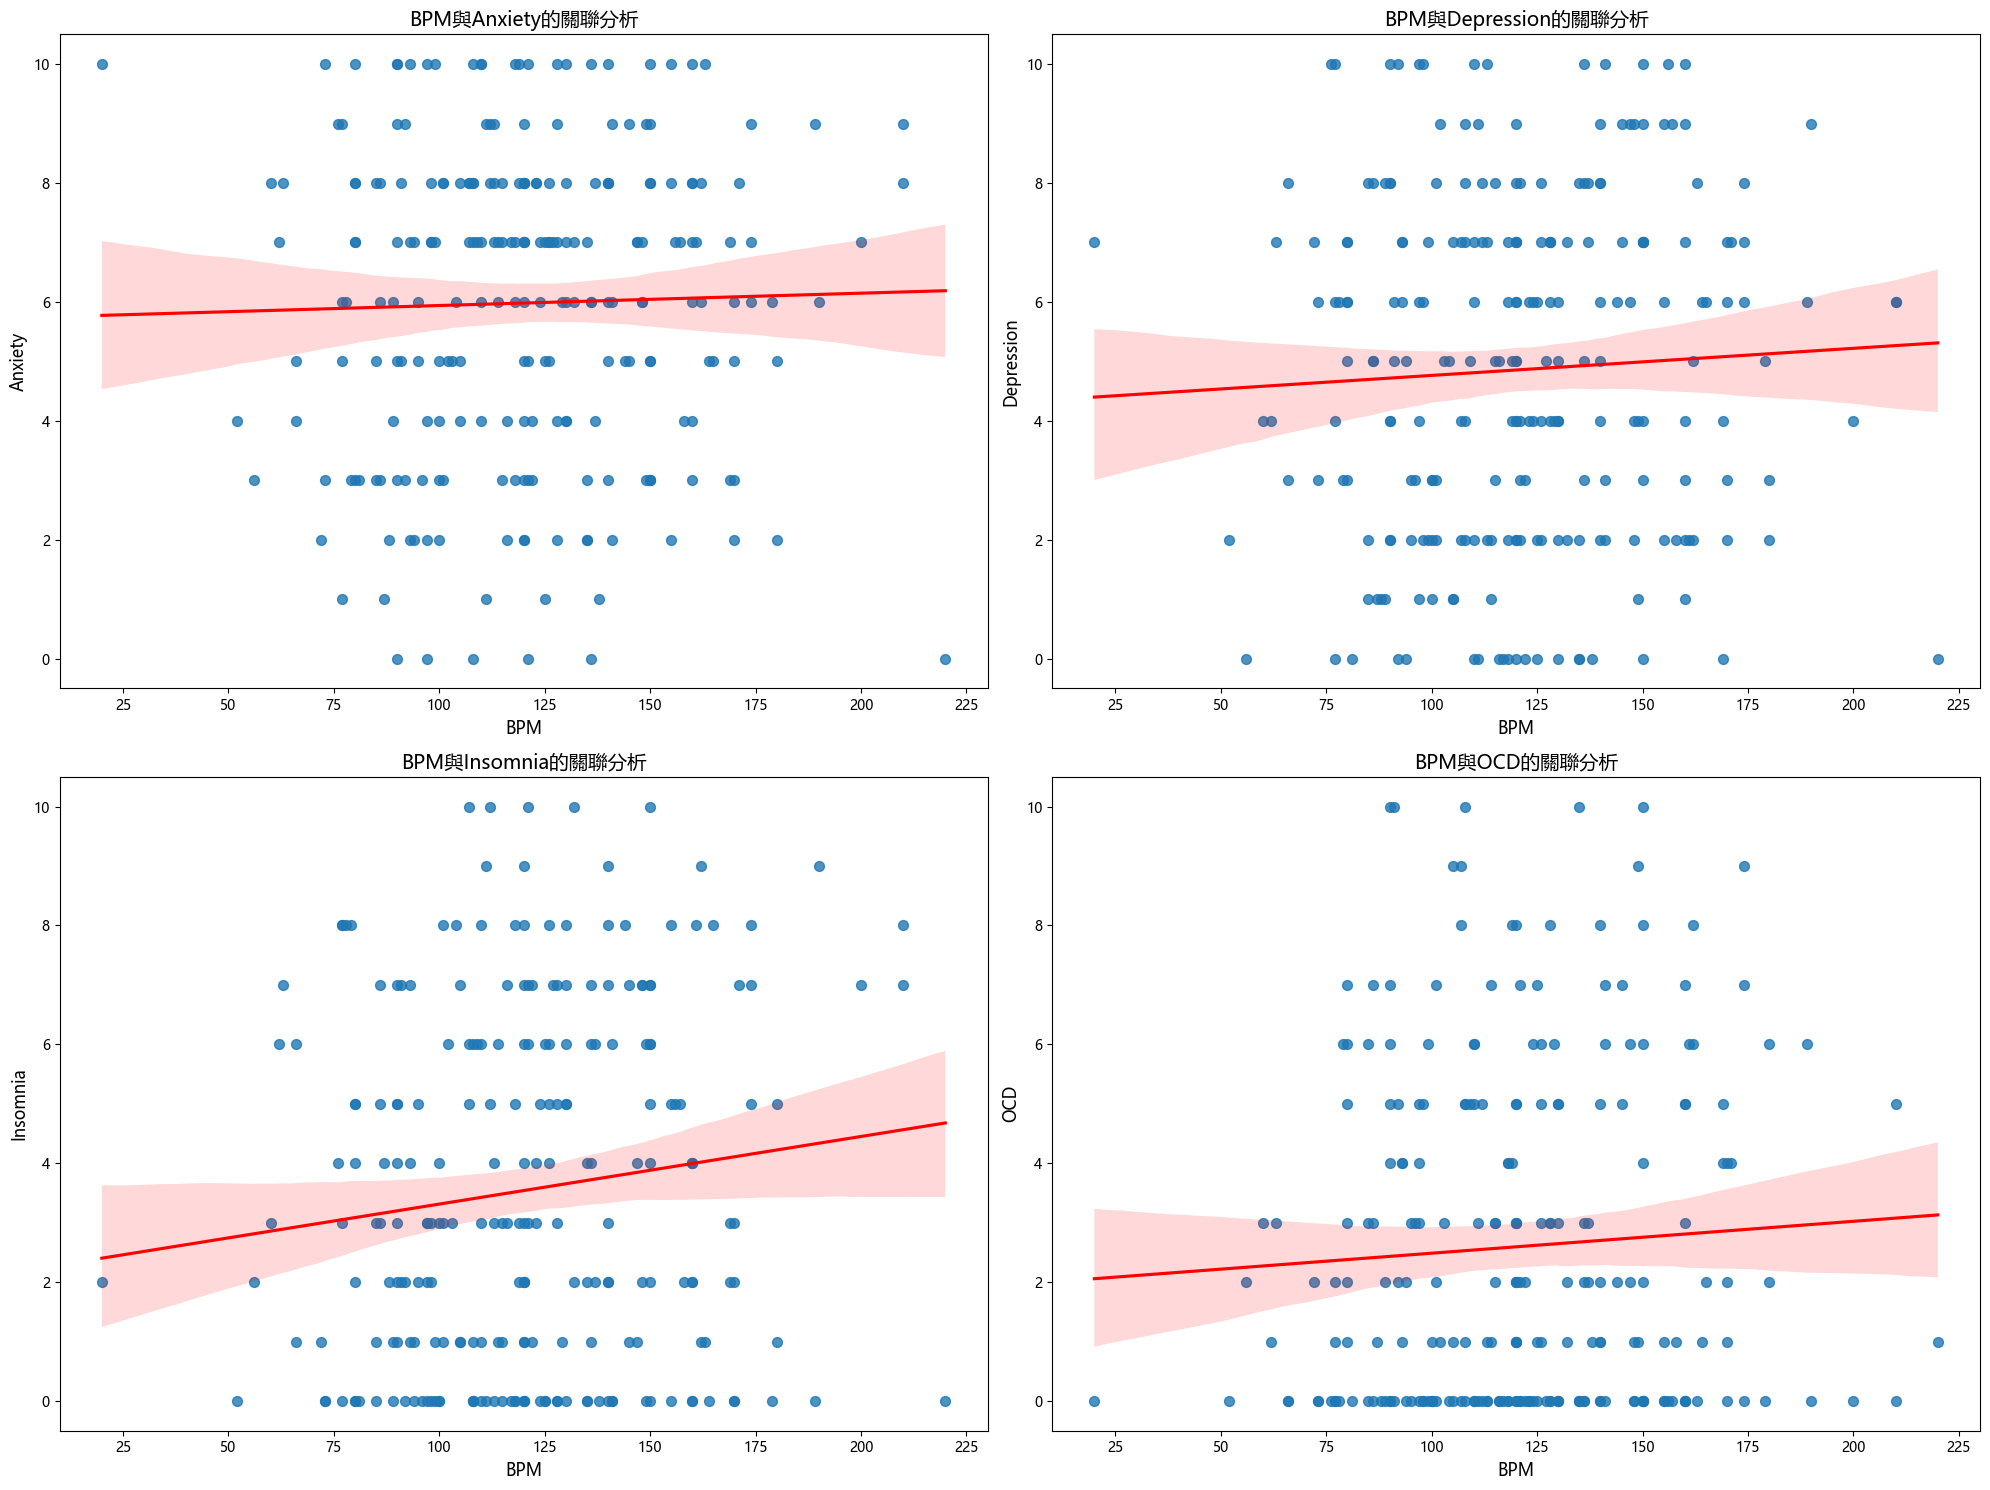

Anxiety       0.025093
Depression    0.050220
Insomnia      0.121654
OCD           0.060433
Name: BPM, dtype: float64


In [59]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 15))

for i, disease in enumerate(['Anxiety', 'Depression', 'Insomnia', 'OCD'], 1):
    plt.subplot(2, 2, i)
    sns.regplot(x='BPM', y=disease, data=df, scatter_kws={'s': 50}, line_kws={'color': 'red'})
    plt.title(f'BPM與{disease}的關聯分析', fontsize=14)
    plt.xlabel('BPM', fontsize=12)
    plt.ylabel(disease, fontsize=12)

plt.tight_layout()
plt.show()

corr_matrix = df[['BPM', 'Anxiety', 'Depression', 'Insomnia', 'OCD']].corr()

print(corr_matrix['BPM'][1:])

**這些相關係數都接近於 0，表示 BPM 與這些疾病指數之間的線性關係較弱。因此，根據結果，我們無法得出顯著的結論表明 BPM 與這些特定疾病嚴重程度之間存在明顯的相關性。**

In [60]:
anova_results_bpm = {}
for disease in ['Anxiety', 'Depression', 'Insomnia', 'OCD']:
    formula = f'{disease} ~ BPM'
    model = ols(formula, data=df_temp).fit()
    anova_table = sm.stats.anova_lm(model, typ=2)
    anova_results_bpm[disease] = anova_table

print("BPM的ANOVA結果：")
for disease, anova_table in anova_results_bpm.items():
    print(f'ANOVA results for {disease}:')
    print(anova_table)
    print('\n')

BPM的ANOVA結果：
ANOVA results for Anxiety:
               sum_sq     df         F    PR(>F)
BPM          1.013730    1.0  0.146806  0.701956
Residual  1608.918185  233.0       NaN       NaN


ANOVA results for Depression:
               sum_sq     df         F   PR(>F)
BPM          4.893608    1.0  0.589112  0.44354
Residual  1935.472349  233.0       NaN      NaN


ANOVA results for Insomnia:
               sum_sq     df         F    PR(>F)
BPM         30.459077    1.0  3.500135  0.062617
Residual  2027.626030  233.0       NaN       NaN


ANOVA results for OCD:
               sum_sq     df         F    PR(>F)
BPM          6.779937    1.0  0.854081  0.356357
Residual  1849.620063  233.0       NaN       NaN




**焦慮症（Anxiety）：p值大於0.05，BPM對焦慮症狀沒有顯著影響**  
**抑鬱症（Depression）：p值大於0.05，BPM對抑鬱症狀沒有顯著影響**  
**失眠（Insomnia）：p值略大於0.05，BPM對失眠症狀沒有顯著影響，但接近顯著**  
**強迫症（OCD）：p值大於0.05，BPM對強迫症狀沒有顯著影響**  
**這表明，BPM（音樂的每分鐘節拍數）對焦慮症、抑鬱症和強迫症的影響不顯著，對失眠症狀的影響接近顯著，但仍不顯著。總體來看，BPM似乎不是影響這些心理健康狀況的關鍵因素。相較之下，之前的分析顯示音樂類型對某些心理健康狀況（如焦慮症、抑鬱症和失眠）有顯著影響。這可能意味著音樂的種類比其速度對心理健康有更重要的影響。**

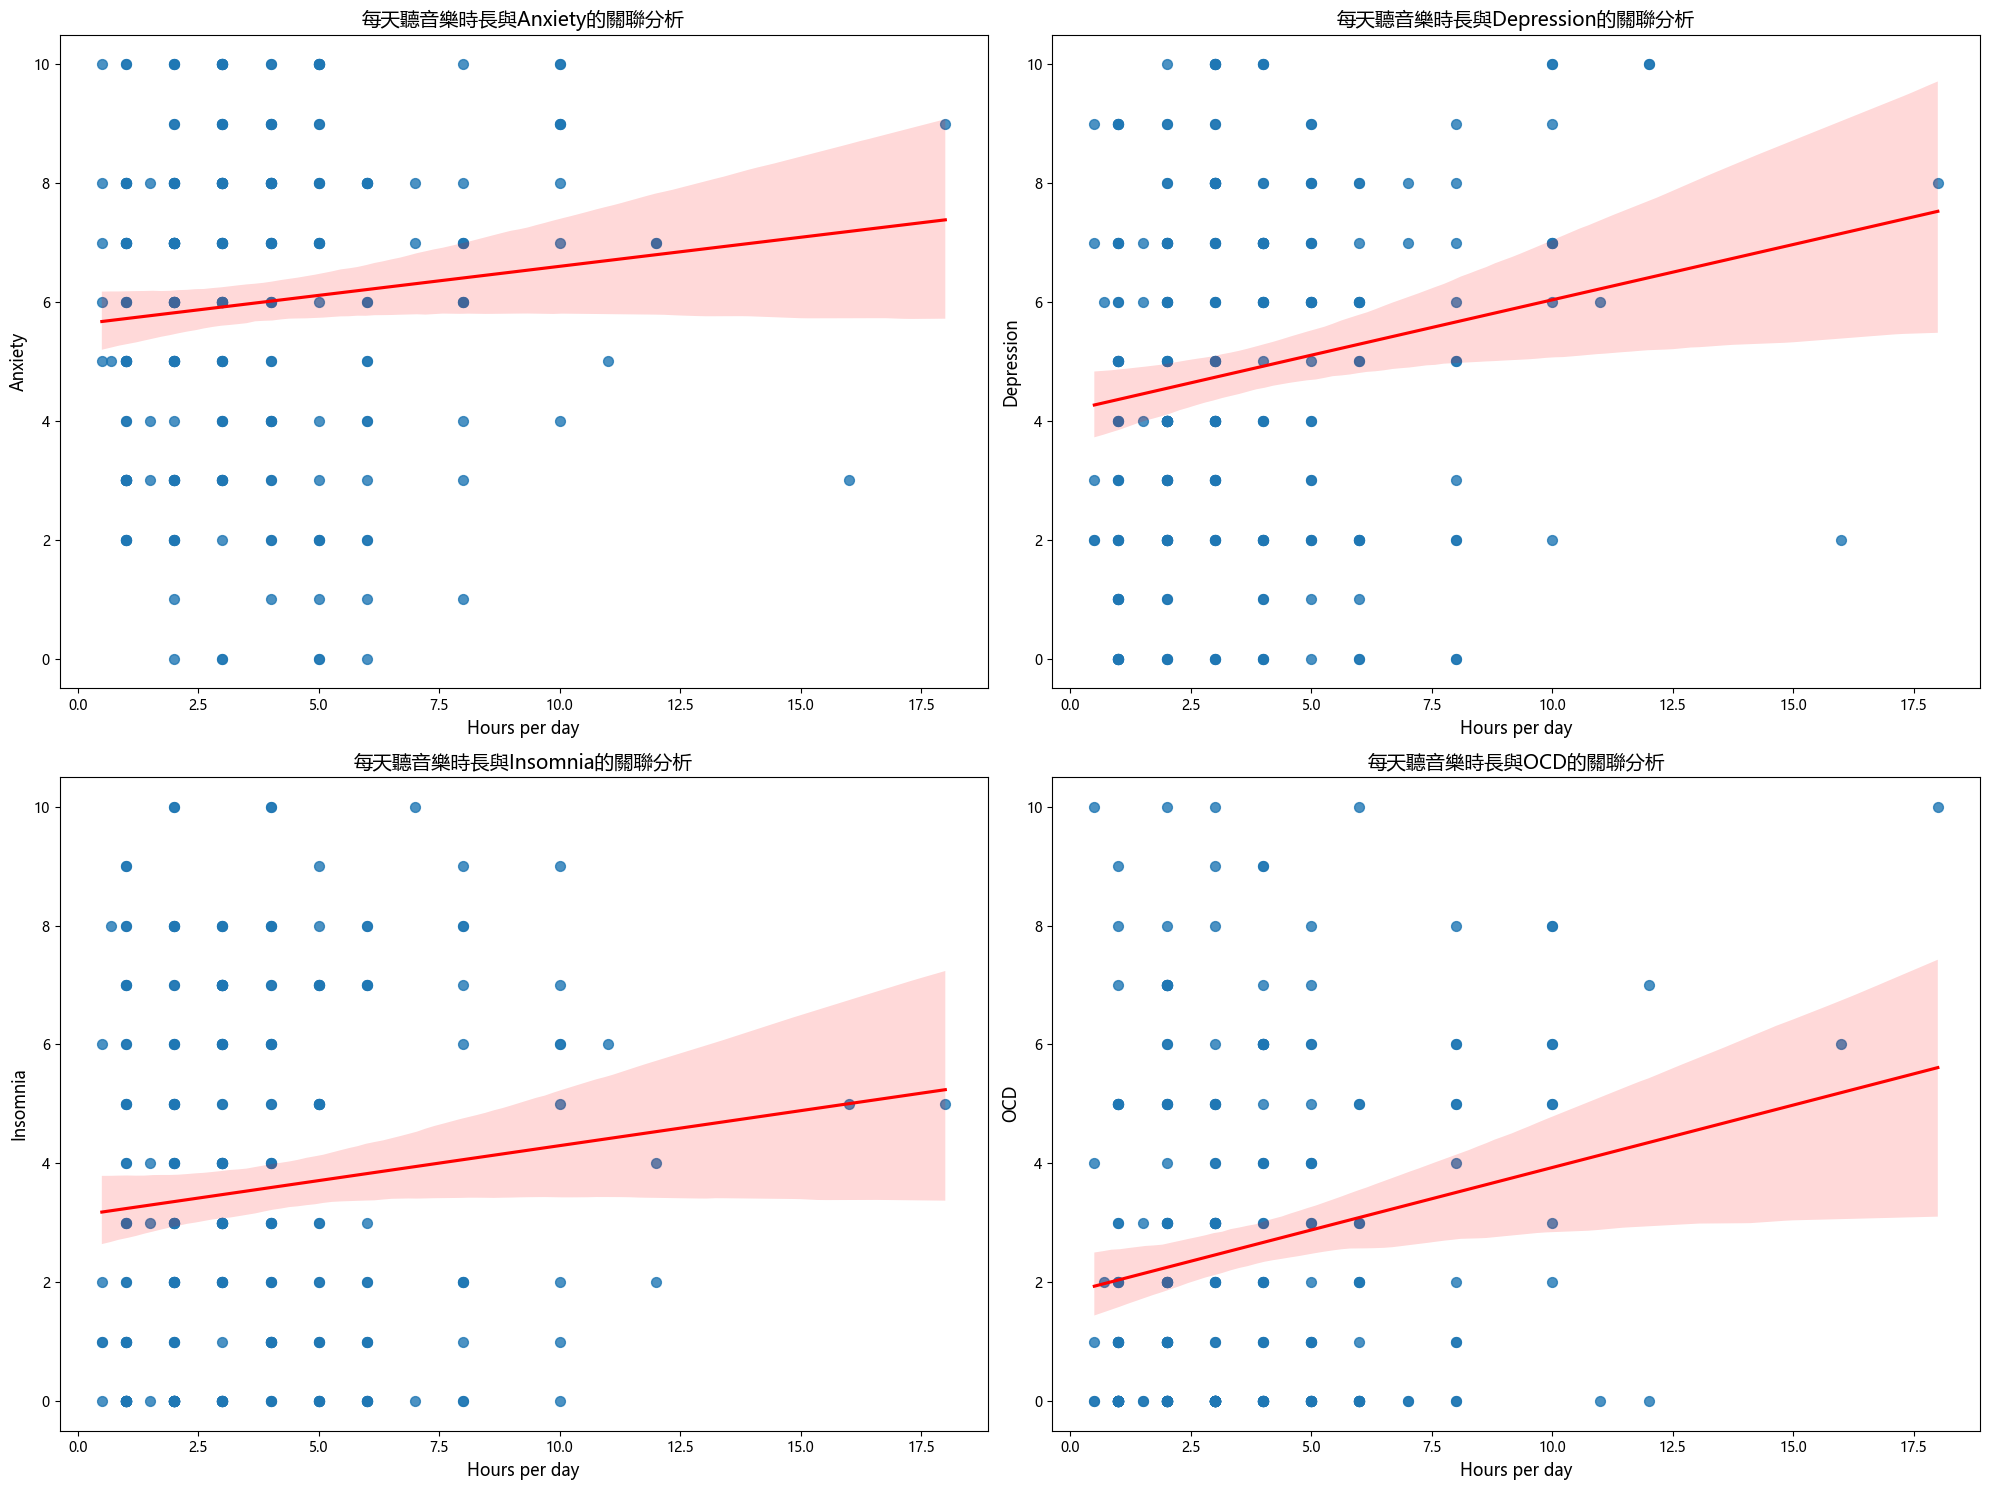

Anxiety       0.100852
Depression    0.175003
Insomnia      0.107375
OCD           0.201934
Name: Hours per day, dtype: float64


In [61]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 15))

for i, disease in enumerate(['Anxiety', 'Depression', 'Insomnia', 'OCD'], 1):
    plt.subplot(2, 2, i)
    sns.regplot(x='Hours per day', y=disease, data=df, scatter_kws={'s': 50}, line_kws={'color': 'red'})
    plt.title(f'每天聽音樂時長與{disease}的關聯分析', fontsize=14)
    plt.xlabel('Hours per day', fontsize=12)
    plt.ylabel(disease, fontsize=12)

plt.tight_layout()
plt.show()

corr_matrix = df[['Hours per day', 'Anxiety', 'Depression', 'Insomnia', 'OCD']].corr()

print(corr_matrix['Hours per day'][1:])

**這些相關係數都接近於 0，表示音樂時數與這些疾病指數之間的線性關係較弱。根據結果，我們無法得出顯著的結論表明音樂時數與這些特定疾病之間存在明顯的相關性。**

In [62]:
anova_results_hours = {}
for disease in ['Anxiety', 'Depression', 'Insomnia', 'OCD']:
    formula = f'{disease} ~ Hours_per_day'
    model = ols(formula, data=df_temp).fit()
    anova_table = sm.stats.anova_lm(model, typ=2)
    anova_results_hours[disease] = anova_table

print("Hours per day的ANOVA結果：")
for disease, anova_table in anova_results_hours.items():
    print(f'ANOVA results for {disease}:')
    print(anova_table)
    print('\n')

Hours per day的ANOVA結果：
ANOVA results for Anxiety:
                    sum_sq     df        F    PR(>F)
Hours_per_day    16.374725    1.0  2.39421  0.123142
Residual       1593.557190  233.0      NaN       NaN


ANOVA results for Depression:
                    sum_sq     df         F    PR(>F)
Hours_per_day    59.425626    1.0  7.361303  0.007162
Residual       1880.940332  233.0       NaN       NaN


ANOVA results for Insomnia:
                    sum_sq     df         F   PR(>F)
Hours_per_day    23.728422    1.0  2.717676  0.10059
Residual       2034.356684  233.0       NaN      NaN


ANOVA results for OCD:
                    sum_sq     df         F    PR(>F)
Hours_per_day    75.698747    1.0  9.904979  0.001863
Residual       1780.701253  233.0       NaN       NaN




**焦慮症（Anxiety）：p值大於0.05，每天聽音樂的時數對焦慮症狀沒有顯著影響**  
**抑鬱症（Depression）：p值小於0.05，每天聽音樂的時數對抑鬱症狀有顯著影響**  
**失眠（Insomnia）：p值大於0.05，每天聽音樂的時數對失眠症狀沒有顯著影響**  
**強迫症（OCD）：p值小於0.05，每天聽音樂的時數對強迫症狀有顯著影響**  
**這表明每天聽音樂的時數對抑鬱症和強迫症有顯著影響，而對焦慮症和失眠的影響不顯著。這些結果可以幫助我們了解每天聽音樂的時數如何影響不同的心理健康狀況，並可能為音樂治療提供有價值的見解。這也提示我們，針對抑鬱症和強迫症，調整聽音樂的時數可能會帶來顯著的效果。**  